### Importing data

In [35]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (2)')

In [37]:
df

,Успех,"Торговельна площа, кв. м.",Этаж,Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,1,МАФ,1,3.0,659.0,76.85,1092.0,13884.0,0,0,0,0,1
1,не успішний,22.00,1,МАФ,1,4.1,1518.0,84.86,348.0,11700.0,0,0,0,1,1
2,не успішний,13.00,1,МАФ,1,3.0,476.0,112.02,504.0,6786.0,0,0,0,1,1
3,не успішний,18.00,1,МАФ,1,3.0,1310.0,119.80,418.0,12948.0,0,0,0,1,1
4,не успішний,25.00,1,Вбудоване приміщення,1,4.0,2029.0,94.88,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,1,МАФ,2,4.0,6884.0,107.37,337.0,9399.0,0,0,0,0,0
65,успішний,21.50,1,МАФ,1,2.3,4721.0,89.13,668.0,14079.0,0,1,1,0,0
66,не успішний,115.23,1,МАФ,1,3.0,3286.0,105.62,295.0,11427.0,0,0,0,0,0
67,не успішний,34.80,1,Вбудоване приміщення,2,4.3,3963.0,168.07,0.0,13338.0,0,1,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Торговельна площа, кв. м.         69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Тип                               69 non-null     object 
 4   Количество касс                   69 non-null     int64  
 5   Рейтинг в гуглі                   69 non-null     float64
 6   Количество чеков                  62 non-null     float64
 7   Средний чек                       62 non-null     float64
 8   Офіси                             64 non-null     float64
 9   Середній дохід наелення,грн       64 non-null     float64
 10  Магазин мобільного звязку         69 non-null     int64  
 11  Продуктовий ринок                 69 non-null     int64  
 12  Речовий ри

In [39]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

### Missing data

In [40]:
df.dtypes

Успех                                object
Торговельна площа, кв. м.           float64
Тип                                  object
Количество касс                       int64
Рейтинг в гуглі                     float64
Количество чеков                    float64
Средний чек                         float64
Офіси                               float64
Середній дохід наелення,грн         float64
Магазин мобільного звязку             int64
Продуктовий ринок                     int64
Речовий ринок                         int64
Транзитна зупинка міжміського ГТ      int64
Зупинка ГТ                            int64
dtype: object

In [55]:
!pip install sklearn

In [42]:
from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Количество чеков']] = imputer_mean.fit_transform(df[['Количество чеков']]).round()
df[['Средний чек']] = imputer_mean.fit_transform(df[['Средний чек']]).round()
df[['Офіси']] = imputer_mean.fit_transform(df[['Офіси']]).round()
df[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(df[['Середній дохід наелення,грн']]).round()

In [43]:
df.isnull().sum()

Успех                               0
Торговельна площа, кв. м.           0
Тип                                 0
Количество касс                     0
Рейтинг в гуглі                     0
Количество чеков                    0
Средний чек                         0
Офіси                               0
Середній дохід наелення,грн         0
Магазин мобільного звязку           0
Продуктовий ринок                   0
Речовий ринок                       0
Транзитна зупинка міжміського ГТ    0
Зупинка ГТ                          0
dtype: int64

### Outliers

In [44]:
df.describe()

,"Торговельна площа, кв. м.",Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,1.231884,3.810145,4079.768116,95.942029,439.884058,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319
std,21.704293,0.458416,0.695605,2210.847031,18.185227,442.698760,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192
min,4.000000,1.000000,1.800000,476.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,3.000000,2344.000000,85.000000,126.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,1.000000,4.000000,4080.000000,95.000000,348.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.000000,4.300000,4826.000000,101.000000,573.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119.300000,3.000000,5.000000,9687.000000,168.000000,2185.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [46]:
# Outliers
df = outliers(df)
df

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.000000,МАФ,1.0,3.0,659.0,77.000000,1092.0,13884.0,0.0,0,0,0,1
1,не успішний,22.000000,МАФ,1.0,4.1,1518.0,85.000000,348.0,11700.0,0.0,0,0,1,1
2,не успішний,13.000000,МАФ,1.0,3.0,476.0,112.000000,504.0,6786.0,0.0,0,0,1,1
3,не успішний,18.000000,МАФ,1.0,3.0,1310.0,120.000000,418.0,12948.0,0.0,0,0,1,1
4,не успішний,25.000000,Вбудоване приміщення,1.0,4.0,2029.0,95.000000,108.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.780000,МАФ,2.0,4.0,6884.0,107.000000,337.0,9399.0,0.0,0,0,0,0
65,успішний,21.500000,МАФ,1.0,2.3,4721.0,89.000000,668.0,14079.0,0.0,1,1,0,0
66,не успішний,99.985025,МАФ,1.0,3.0,3286.0,106.000000,295.0,11427.0,0.0,0,0,0,0
67,не успішний,34.800000,Вбудоване приміщення,2.0,4.3,3963.0,150.497709,0.0,13338.0,0.0,1,1,0,0


### Encoding

In [47]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,3,"[МАФ, Вбудоване приміщення, Острівок на ринку]",object


In [48]:
# Encoding
type = {'МАФ':0,'Вбудоване приміщення':1,'Острівок на ринку':2}
df['Тип'] = df['Тип'].map(type)
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
df



,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0,9.000000,0,1.0,3.0,659.0,77.000000,1092.0,13884.0,0.0,0,0,0,1
1,0,22.000000,0,1.0,4.1,1518.0,85.000000,348.0,11700.0,0.0,0,0,1,1
2,0,13.000000,0,1.0,3.0,476.0,112.000000,504.0,6786.0,0.0,0,0,1,1
3,0,18.000000,0,1.0,3.0,1310.0,120.000000,418.0,12948.0,0.0,0,0,1,1
4,0,25.000000,1,1.0,4.0,2029.0,95.000000,108.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.780000,0,2.0,4.0,6884.0,107.000000,337.0,9399.0,0.0,0,0,0,0
65,1,21.500000,0,1.0,2.3,4721.0,89.000000,668.0,14079.0,0.0,1,1,0,0
66,0,99.985025,0,1.0,3.0,3286.0,106.000000,295.0,11427.0,0.0,0,0,0,0
67,0,34.800000,1,2.0,4.3,3963.0,150.497709,0.0,13338.0,0.0,1,1,0,0


### Correlation

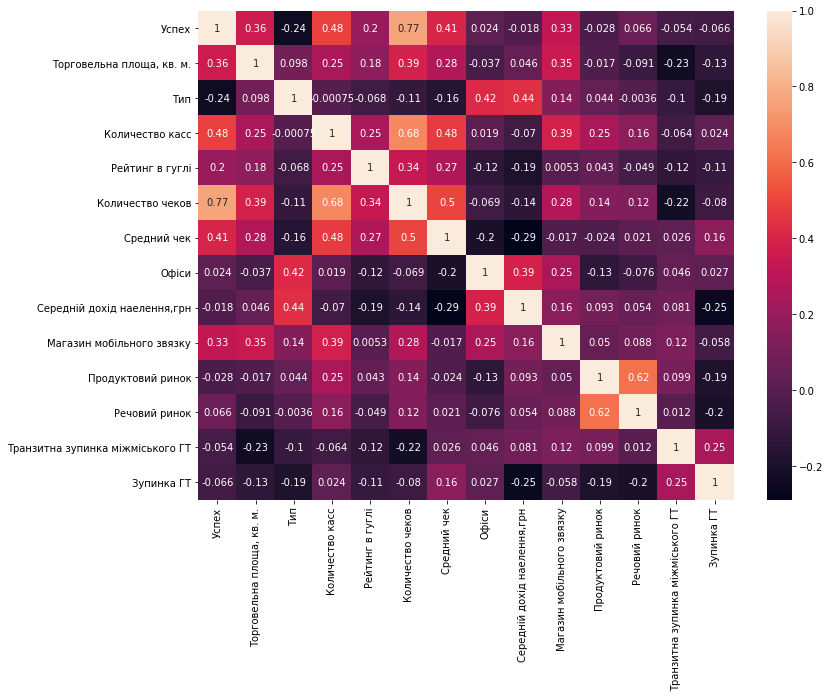

In [49]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [50]:
# Splitting the dataset into the Training set and Test set

f = ['Успех','Торговельна площа, кв. м.','Тип','Количество касс','Рейтинг в гуглі','Количество чеков','Средний чек','Офіси','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']
X = df[f]
y = df['Успех']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [51]:
df.to_csv('prep.csv', sep=',', index=False)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection


In [56]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

PerfectSeparationError: Perfect separation detected, results not available

### Hierarchical clustering

In [57]:
df = pd.read_csv('prep.csv', sep=',')
df

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0,9.000000,0,1.0,3.0,659.0,77.000000,1092.0,13884.0,0.0,0,0,0,1
1,0,22.000000,0,1.0,4.1,1518.0,85.000000,348.0,11700.0,0.0,0,0,1,1
2,0,13.000000,0,1.0,3.0,476.0,112.000000,504.0,6786.0,0.0,0,0,1,1
3,0,18.000000,0,1.0,3.0,1310.0,120.000000,418.0,12948.0,0.0,0,0,1,1
4,0,25.000000,1,1.0,4.0,2029.0,95.000000,108.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.780000,0,2.0,4.0,6884.0,107.000000,337.0,9399.0,0.0,0,0,0,0
65,1,21.500000,0,1.0,2.3,4721.0,89.000000,668.0,14079.0,0.0,1,1,0,0
66,0,99.985025,0,1.0,3.0,3286.0,106.000000,295.0,11427.0,0.0,0,0,0,0
67,0,34.800000,1,2.0,4.3,3963.0,150.497709,0.0,13338.0,0.0,1,1,0,0


In [58]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Торговельна площа, кв. м.','Тип','Количество касс','Рейтинг в гуглі','Количество чеков','Средний чек','Офіси','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round()

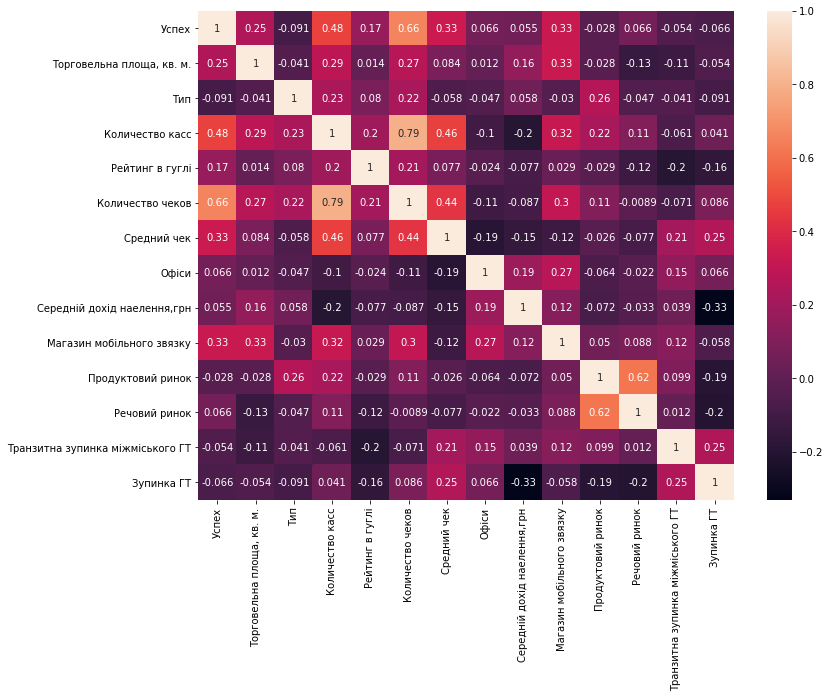

In [59]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

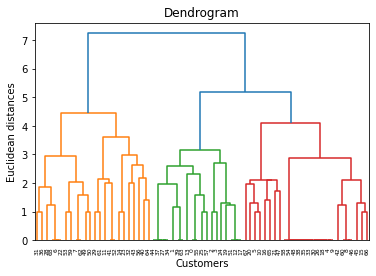

In [60]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model


In [61]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [62]:
hc

array([2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1,
       1, 1, 0], dtype=int64)

### Feature Reduction

In [63]:
# Less features
X = df.iloc[:, [0, 3, 5]]

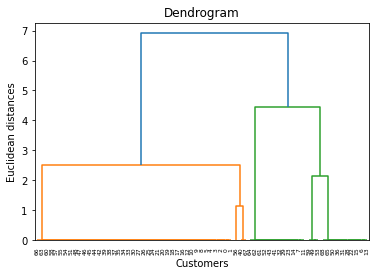

In [64]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [65]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [66]:
hc

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

### K-Means Clustering 

In [67]:
df = pd.read_csv('prep.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Торговельна площа, кв. м.','Тип','Количество касс','Рейтинг в гуглі','Количество чеков','Средний чек','Офіси','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round()


,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


### Number of clusters

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


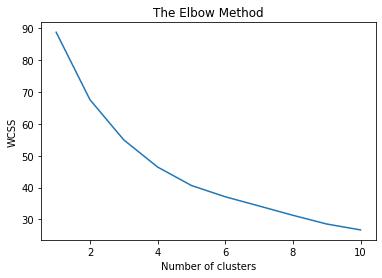

In [68]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

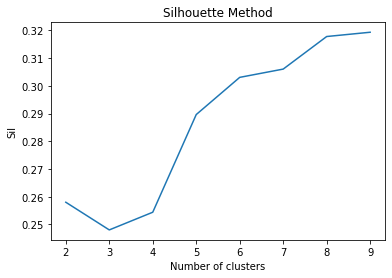

2:0.2580277584395783
3:0.24804631184559955
4:0.2544258647158285
5:0.28964177216701614
6:0.30305366863310573
7:0.3060361340647128
8:0.31778033590561067
9:0.3193230775223327


In [72]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [73]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Торговельна площа, кв. м.','Тип','Количество касс','Рейтинг в гуглі','Количество чеков','Средний чек','Офіси','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round(2)

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,1.00,0.43,0.16,0.28,0.71,0.63,0.48,0.26,0.65,0.14,0.05,0.05,0.09,0.32
1,0.00,0.20,0.18,-0.00,0.52,0.19,0.32,0.25,0.60,-0.00,0.00,0.00,0.18,1.00
2,0.00,0.33,0.34,0.03,0.63,0.27,0.29,0.26,0.71,-0.00,0.00,0.05,0.00,0.00
3,0.27,0.25,0.23,0.26,0.63,0.44,0.30,0.18,0.71,0.09,1.00,0.64,0.18,0.09


### Feature Reduction

In [74]:
# Less features
X = df[:, [0, 3, 5]]

In [75]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество касс','Количество чеков']).round()

,Успех,Количество касс,Количество чеков
0,-0.0,0.0,0.0
1,1.0,0.0,1.0


In [76]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.726

 Результаты иерархической кластеризации пересекаются на 72.6 % с результатами кластеризации на основе К-средних